In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Fir_Details_final_refined.csv')

C:\Users\HP1\AppData\Local\Temp\ipykernel_21000\512808068.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Fir_Details_final_refined.csv')


In [3]:
df

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,Direction,Day_Offence_From,Hour_Offence_From,Minute_Offence_From,Day_Offence_To,Hour_Offence_To,Minute_Offence_To,Day_FIR_Reg,Hour_FIR_Reg,Minute_FIR_Reg
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00,05/01/2016,...,WEST,27,12,0,27.0,12.0,5.0,5,11,0
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00,2016-01-12 17:35:00,2016-01-12 19:00:00,12/01/2016,...,WEST,12,17,30,12.0,17.0,35.0,12,19,0
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00,2016-01-12 17:50:00,2016-01-12 19:30:00,12/01/2016,...,EAST,12,17,45,12.0,17.0,50.0,12,19,30
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00,2016-01-14 21:35:00,2016-01-15 14:00:00,15/01/2016,...,WEST,14,21,30,14.0,21.0,35.0,15,14,0
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00,2016-01-18 15:05:00,2016-01-18 19:30:00,18/01/2016,...,NORTH,18,15,0,18.0,15.0,5.0,18,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694178,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00,2024-01-10 21:30:00,2024-01-11 21:30:00,11/01/2024,...,EAST,10,5,30,10.0,21.0,30.0,11,21,30
1694179,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00,2024-01-19 22:35:00,2024-01-29 19:30:00,29/01/2024,...,WEST,19,22,30,19.0,22.0,35.0,29,19,30
1694180,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00,2024-02-06 15:45:00,2024-02-07 17:45:00,07/02/2024,...,EAST,6,15,42,6.0,15.0,45.0,7,17,45
1694181,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00,2024-02-19 12:15:00,2024-02-24 17:00:00,24/02/2024,...,WEST,19,12,10,19.0,12.0,15.0,24,17,0


In [4]:
df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS',
       'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl',
       'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male',
       'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count',
       'Conviction Count', 'FIR_ID', 'Unit_ID', 'Crime_No', 'Distance',
       'Direction', 'Day_Offence_From', 'Hour_Offence_From',
       'Minute_Offence_From', 'Day_Offence_To', 'Hour_Offence_To',
       'Minute_Offence_To', 'Day_FIR_Reg', 'Hour_FIR_Reg', 'Minute_FIR_Reg'],
      dtype='object')

In [5]:
df['FIR Type'] = df['FIR Type'].replace({'Heinous': 1, 'Non Heinous': 0})

In [6]:
df['FIR Type'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Conviction Count']

0          0
1          2
2          0
3          0
4          0
          ..
1694178    0
1694179    0
1694180    0
1694181    0
1694182    0
Name: Conviction Count, Length: 1694183, dtype: int64

In [8]:
df['UnitName'].unique().size

1055

In [9]:
import pandas as pd


df['UnitName_encoded'], mapping_index = pd.factorize(df['UnitName'])

mapping_dict = {v: k for v, k in enumerate(mapping_index)}


print(df['UnitName_encoded'].unique().size)

print(mapping_dict)


1055
{0: 'Amengad PS', 1: 'Badami PS', 2: 'Bagalkot CEN Crime PS', 3: 'Bagalkot Rural PS', 4: 'Bagalkot Town PS', 5: 'Bagalkot Traffic PS', 6: 'Bagalkot Women PS', 7: 'Banahatti PS', 8: 'Bilagi PS', 9: 'Guledagudda PS', 10: 'Hungunda PS', 11: 'Ilakal PS', 12: 'Ilakal Rural PS', 13: 'Jamakhandi Rural PS', 14: 'Jamakhandi Town PS', 15: 'Kaladagi PS', 16: 'Kerur PS', 17: 'Lokapur PS', 18: 'Mahalingapur PS', 19: 'Mudhol PS', 20: 'Navanagara PS', 21: 'Savalgi PS', 22: 'Teradal PS', 23: 'APMC Yard PS', 24: 'Ballari CEN Crime PS', 25: 'Ballari Women PS', 26: 'Bellary Rural PS', 27: 'Bellary Traffic PS', 28: 'Brucepet PS', 29: 'Choranuru PS', 30: 'Cowlbazar PS', 31: 'Gadiganur PS', 32: 'Gandhinagar PS', 33: 'Hatcholli PS', 34: 'Kampli  PS', 35: 'Kuduthini PS', 36: 'Kurugod PS', 37: 'Moka PS', 38: 'P.D. Halli PS', 39: 'Sandur PS', 40: 'Sirigeri PS', 41: 'Siruguppa PS', 42: 'Tekkalkota PS', 43: 'Thoranagal PS', 44: 'Bagewadi PS', 45: 'Belagavi City CEN Crime PS', 46: 'Belagavi City Women PS', 47

In [10]:
df['UnitName_encoded']

0             0
1             0
2             0
3             0
4             0
           ... 
1694178    1054
1694179    1054
1694180    1054
1694181    1054
1694182    1054
Name: UnitName_encoded, Length: 1694183, dtype: int64

In [11]:
X = df[['Year', 'Month', 'Day_Offence_From', 'Day_Offence_To', 'Hour_Offence_From','Hour_Offence_To', 'Minute_Offence_From', 'Minute_Offence_To', 'UnitName_encoded']]


In [12]:
# Create 'Crime_Index' by combining and scaling the existing columns as per the given formula
df['Crime_Index'] = df['Accused_ChargeSheeted Count'] + 10 * df['FIR Type'] + 10 * df['VICTIM COUNT'] + df['Conviction Count']


In [13]:
Y = df['Crime_Index']

In [14]:
Y

0           1
1           7
2           1
3           1
4          11
           ..
1694178     0
1694179    10
1694180     0
1694181    10
1694182     0
Name: Crime_Index, Length: 1694183, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming X and Y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




In [24]:
# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [25]:
# Define the ANN architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(), loss='mse')



In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=0)



In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, plot the training loss and validation loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

C:\Users\HP1\AppData\Local\Temp\ipykernel_21000\1992784591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['Year', 'Month', 'Day_Offence_From'], inplace=True)
C:\Users\HP1\AppData\Local\Temp\ipykernel_21000\1992784591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Year'].astype(int)
C:\Users\HP1\AppData\Local\Temp\ipykernel_21000\1992784591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


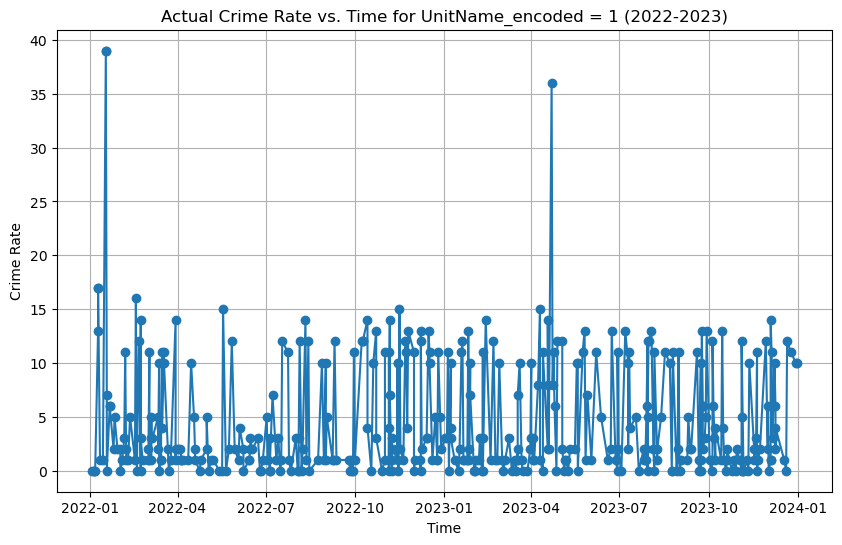

In [21]:
import matplotlib.pyplot as plt

# Filter the DataFrame for UnitName_encoded = 1
df_filtered = df[df['UnitName_encoded'] == 1]

df_filtered.dropna(subset=['Year', 'Month', 'Day_Offence_From'], inplace=True)

# Ensure data types are correct
df_filtered['Year'] = df_filtered['Year'].astype(int)
df_filtered['Month'] = df_filtered['Month'].astype(int)
df_filtered['Day_Offence_From'] = df_filtered['Day_Offence_From'].astype(int)

# Combine and convert to datetime, coercing errors to NaT
df_filtered['DateTime'] = pd.to_datetime(df_filtered['Year'].astype(str) + '-' +
                                         df_filtered['Month'].astype(str) + '-' +
                                         df_filtered['Day_Offence_From'].astype(str), 
                                         format='%Y-%m-%d', errors='coerce')

# Handling NaT values - you can choose to drop them or handle them differently
# Here, dropping rows with NaT values
df_filtered = df_filtered.dropna(subset=['DateTime'])

# Sorting by DateTime to ensure the graph is in chronological order
df_filtered_sorted = df_filtered.sort_values('DateTime')

# Further filter the DataFrame to only include data from 2022 to 2023
df_filtered_2022_2023 = df_filtered[(df_filtered['DateTime'] >= '2022-01-01') &
                                    (df_filtered['DateTime'] <= '2023-12-31')]

# Sorting by DateTime to ensure the graph is in chronological order
df_filtered_2022_2023_sorted = df_filtered_2022_2023.sort_values('DateTime')

# Plotting the graph for 2022-2023
plt.figure(figsize=(10, 6))
plt.plot(df_filtered_2022_2023_sorted['DateTime'], df_filtered_2022_2023_sorted['Crime_Index'], marker='o', linestyle='-')
plt.title('Actual Crime Rate vs. Time for UnitName_encoded = 1 (2022-2023)')
plt.xlabel('Time')
plt.ylabel('Crime Rate')
plt.grid(True)
plt.show()

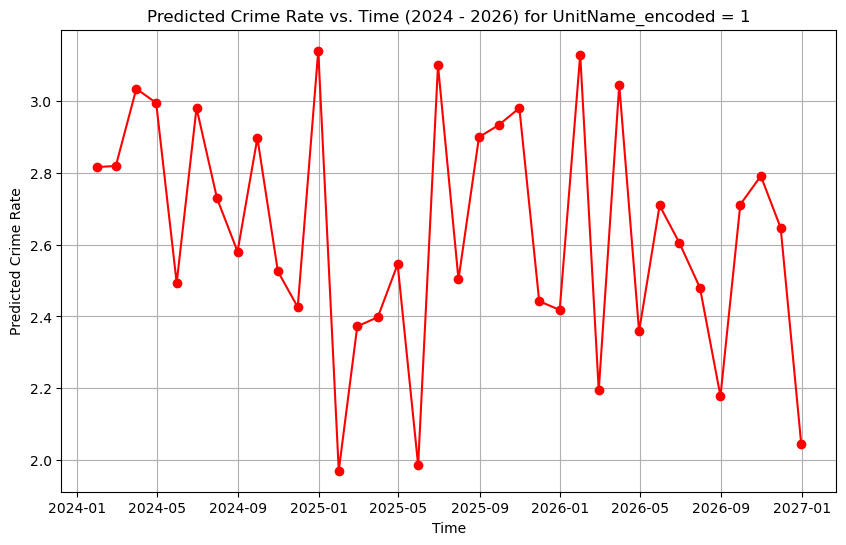

In [20]:
import numpy as np

# Assuming your model is trained and named 'model'
# You need to create a DataFrame for the years 2024 to 2026 for UnitName_encoded = 1
# Here, you should provide appropriate values for the columns based on your dataset characteristics

# Creating a DataFrame for the prediction period (you'll need to adjust the details accordingly)
future_dates = pd.date_range(start='2024-01-01', end='2026-12-31', freq='M')
future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day_Offence_From': np.random.choice(df['Day_Offence_From'].unique(), size=len(future_dates)),
    'Day_Offence_To': np.random.choice(df['Day_Offence_To'].unique(), size=len(future_dates)),
    'Hour_Offence_From': np.random.choice(df['Hour_Offence_From'].unique(), size=len(future_dates)),
    'Hour_Offence_To': np.random.choice(df['Hour_Offence_To'].unique(), size=len(future_dates)),
    'Minute_Offence_From': np.random.choice(df['Minute_Offence_From'].unique(), size=len(future_dates)),
    'Minute_Offence_To': np.random.choice(df['Minute_Offence_To'].unique(), size=len(future_dates)),
    'UnitName_encoded': 1
})

# Predict the Crime Rate for the future dates
future_df['Predicted_Crime_Rate'] = model.predict(future_df)

# Plotting the predicted crime rate
plt.figure(figsize=(10, 6))
plt.plot(future_dates, future_df['Predicted_Crime_Rate'], marker='o', linestyle='-', color='r')
plt.title('Predicted Crime Rate vs. Time (2024 - 2026) for UnitName_encoded = 1')
plt.xlabel('Time')
plt.ylabel('Predicted Crime Rate')
plt.grid(True)
plt.show()
